In [1]:
# Translate "PlotAnalyticalModel2Curves_v1.m", Sam.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

In [2]:
Vmax = 7;           # Maximum gliding speed (um/s)
k = 300.0;          # Spring constant (pN/um)
fstall = -0.4;      # Stall force (pN)
frupt = -9.2;       # Rupture force (pN)
Tau1 = 0.025;       # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.

$fv = f_{stall}\times (1 - \frac{V}{V_{max}})$ <br>

$(\frac{1}{R} - 1)\times 0.5\times f_{rupt}\times \frac{\frac{f_{rupt}}{k\times \tau_1}}{(\frac{f_{rupt}}{k\times \tau_1} - V)}$

In [3]:
# Values of active motor ratio investigated
#ActiveMotorRatio = np.array([0.8, 0.853721, 0.9, 0.95]);

#ActiveMotorRatio = np.array([0.8, 0.854, 0.908, 0.962]); # difference 0.054
ActiveMotorRatio = np.array([0.8, 0.8537, 0.9074, 0.9611]) # Exact Rc, diff is 0.0537
#0.85379
#ActiveMotorRatio = np.array([0.6, 0.7, 0.8, 0.9]);

# Gliding speed
V = np.arange(0.0,Vmax,0.1);

# f-V relation
fV = fstall*(1.0 - (V/Vmax));

# V-fimp relation
fFric = []

In [4]:
for I in range(len(ActiveMotorRatio)):
    fFric.append( (1/ActiveMotorRatio[I] - 1.0)*0.5*frupt*frupt/k/Tau1/(frupt/k/Tau1 - V) )

In [5]:
len(ActiveMotorRatio)

4

In [6]:
len(V)

70

In [7]:
len(fFric)

4

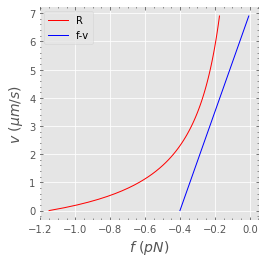

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[0],V,'r-', lw=1, label='R')
ax.plot(fV,V,'b-',lw=1, label='f-v')

ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$f\ (pN)$', fontsize=14); ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-no-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

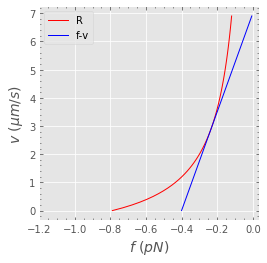

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[1],V,'r-', lw=1, label='R')
ax.plot(fV,V,'b-',lw=1, label='f-v')

ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$f\ (pN)$', fontsize=14); ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-1-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

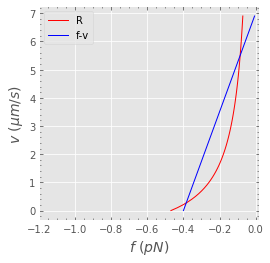

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fFric[2],V,'r-', lw=1, label='R')
ax.plot(fV,V,'b-',lw=1, label='f-v')

ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$f\ (pN)$', fontsize=14); ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/analy-2-sol.pdf', format='pdf', bbox_inches='tight')

plt.show()

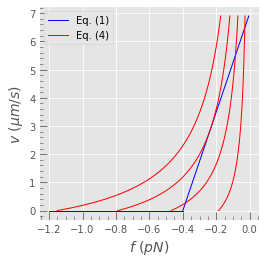

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fV,V,'b-',lw=1, label='Eq. (1)') # f-v
ax.plot([-1.2,-0.4],[0,0],'b-',lw=1)

for I in range(len(ActiveMotorRatio)):
    if I==0:
        ax.plot(fFric[I],V,'r-', lw=1, label='Eq. (4)') # $r_{substrate}$
    else:
        ax.plot(fFric[I],V,'r-', lw=1)

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.set_xticks(np.arange(-1.2,0.1,0.2))
ax.minorticks_on()

ax.tick_params(direction='in', length=8, which = 'major')
ax.tick_params(direction='in', length=4, which = 'minor')

ax.set_xlabel('$f\ (pN)$', fontsize=14); ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/impedance.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/impedance.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/analy-all-sol.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('fig/analy-all-sol.svg', format='svg', bbox_inches='tight')

plt.show()

In [13]:
fV

array([-0.4       , -0.39428571, -0.38857143, -0.38285714, -0.37714286,
       -0.37142857, -0.36571429, -0.36      , -0.35428571, -0.34857143,
       -0.34285714, -0.33714286, -0.33142857, -0.32571429, -0.32      ,
       -0.31428571, -0.30857143, -0.30285714, -0.29714286, -0.29142857,
       -0.28571429, -0.28      , -0.27428571, -0.26857143, -0.26285714,
       -0.25714286, -0.25142857, -0.24571429, -0.24      , -0.23428571,
       -0.22857143, -0.22285714, -0.21714286, -0.21142857, -0.20571429,
       -0.2       , -0.19428571, -0.18857143, -0.18285714, -0.17714286,
       -0.17142857, -0.16571429, -0.16      , -0.15428571, -0.14857143,
       -0.14285714, -0.13714286, -0.13142857, -0.12571429, -0.12      ,
       -0.11428571, -0.10857143, -0.10285714, -0.09714286, -0.09142857,
       -0.08571429, -0.08      , -0.07428571, -0.06857143, -0.06285714,
       -0.05714286, -0.05142857, -0.04571429, -0.04      , -0.03428571,
       -0.02857143, -0.02285714, -0.01714286, -0.01142857, -0.00

In [14]:
import subprocess
subprocess.call('inkscape fig/analy-all-sol.svg -M fig/analy-all-sol.emf', shell=True)

0

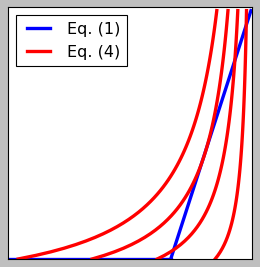

In [16]:
plt.style.use('classic')

fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fV,V,'b-',lw=3, label='Eq. (1)') # f-v
ax.plot([-1.2,-0.4],[0,0],'b-',lw=3)

for I in range(len(ActiveMotorRatio)):
    if I==0:
        ax.plot(fFric[I],V,'r-', lw=3, label='Eq. (4)') # $r_{substrate}$
    else:
        ax.plot(fFric[I],V,'r-', lw=3)

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.set_xticks([])#np.arange(-1.2,0.1,0.2))
ax.set_yticks([])

# ax.minorticks_on()

# ax.tick_params(direction='in', length=8, which = 'major')
# ax.tick_params(direction='in', length=4, which = 'minor')

#ax.set_xlabel('$f$', fontsize=14); ax.set_ylabel('$v$', fontsize=14)
ax.legend(loc='upper left')

#plt.savefig('fig/impedance.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/impedance.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/analy-all-sol-sketch.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('fig/analy-all-sol-sketch.svg', format='svg', bbox_inches='tight')

plt.show()

In [18]:
import subprocess
subprocess.call('inkscape fig/analy-all-sol-sketch.svg -M fig/analy-all-sol-sketch.emf', shell=True)

0

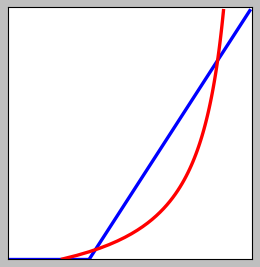

In [50]:
plt.style.use('classic')

fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fV,V,'b-',lw=3)#, label='Eq. (1)') # f-v
ax.plot([-1.2,-0.4],[0,0],'b-',lw=3)

ax.plot(fFric[2],V,'r-', lw=3)

# for I in range(len(ActiveMotorRatio)):
#     if I==0:
#         ax.plot(fFric[I],V,'r-', lw=3, label='Eq. (4)') # $r_{substrate}$
#     else:
#         ax.plot(fFric[I],V,'r-', lw=3)

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.set_xticks([])#np.arange(-1.2,0.1,0.2))
ax.set_yticks([])

ax.set_xlim(-0.6,0)

# ax.minorticks_on()

# ax.tick_params(direction='in', length=8, which = 'major')
# ax.tick_params(direction='in', length=4, which = 'minor')

#ax.set_xlabel('$f$', fontsize=14); ax.set_ylabel('$v$', fontsize=14)

#ax.legend(loc='upper left')

#plt.savefig('fig/impedance.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/impedance.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/analy-all-sol-sketch-4_1.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('fig/analy-all-sol-sketch-4_1.svg', format='svg', bbox_inches='tight')

plt.show()

In [51]:
import subprocess
subprocess.call('inkscape fig/analy-all-sol-sketch-4_1.svg -M fig/analy-all-sol-sketch-4_1.emf', shell=True)

0

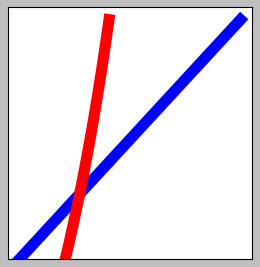

In [52]:
plt.style.use('classic')

fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fV,V,'b-',lw=10)#, label='Eq. (1)') # f-v
ax.plot([-1.2,-0.4],[0,0],'b-',lw=10)

ax.plot(fFric[2],V,'r-', lw=10)

# for I in range(len(ActiveMotorRatio)):
#     if I==0:
#         ax.plot(fFric[I],V,'r-', lw=3, label='Eq. (4)') # $r_{substrate}$
#     else:
#         ax.plot(fFric[I],V,'r-', lw=3)

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.set_xticks([])#np.arange(-1.2,0.1,0.2))
ax.set_yticks([])

ax.set_xlim(-0.12,0.0)
ax.set_ylim(5,7)

# ax.minorticks_on()

# ax.tick_params(direction='in', length=8, which = 'major')
# ax.tick_params(direction='in', length=4, which = 'minor')

#ax.set_xlabel('$f$', fontsize=14); ax.set_ylabel('$v$', fontsize=14)

#ax.legend(loc='upper left')

#plt.savefig('fig/impedance.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/impedance.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/analy-all-sol-sketch-4_2.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/analy-all-sol-sketch-4_2.svg', format='svg', bbox_inches='tight')

plt.show()

In [53]:
import subprocess
subprocess.call('inkscape fig/analy-all-sol-sketch-4_2.svg -M fig/analy-all-sol-sketch-4_2.emf', shell=True)

0

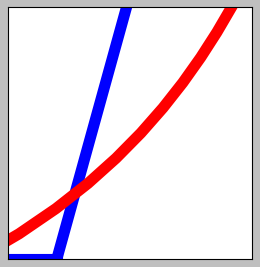

In [54]:
plt.style.use('classic')

fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(fV,V,'b-',lw=10)#, label='Eq. (1)') # f-v
ax.plot([-1.2,-0.4],[0,0],'b-',lw=10)

ax.plot(fFric[2],V,'r-', lw=10)

# for I in range(len(ActiveMotorRatio)):
#     if I==0:
#         ax.plot(fFric[I],V,'r-', lw=3, label='Eq. (4)') # $r_{substrate}$
#     else:
#         ax.plot(fFric[I],V,'r-', lw=3)

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.set_xticks([])#np.arange(-1.2,0.1,0.2))
ax.set_yticks([])

ax.set_xlim(-0.44,-0.24)
ax.set_ylim(0,1)

# ax.minorticks_on()

# ax.tick_params(direction='in', length=8, which = 'major')
# ax.tick_params(direction='in', length=4, which = 'minor')

#ax.set_xlabel('$f$', fontsize=14); ax.set_ylabel('$v$', fontsize=14)

#ax.legend(loc='upper left')

#plt.savefig('fig/impedance.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/impedance.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/analy-all-sol-sketch-4_3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/analy-all-sol-sketch-4_3.svg', format='svg', bbox_inches='tight')

plt.show()

In [55]:
import subprocess
subprocess.call('inkscape fig/analy-all-sol-sketch-4_3.svg -M fig/analy-all-sol-sketch-4_3.emf', shell=True)

0

In [13]:
myo_fv = pd.DataFrame({'f0':fFric[0], 'f1':fFric[1], 'f2':fFric[2], 'f3':fFric[3], 'v':V})
myo_fv.to_csv('myo_fv.csv', index=False)

In [14]:
myo = pd.read_csv('myo_fv.csv')
mt = pd.read_csv('mt_fv.csv')

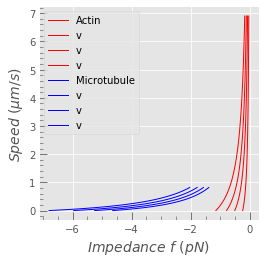

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.plot(myo['f0'], myo['v'], color='red', lw=1, label='Actin')
ax.plot(myo['f1'], myo['v'], color='red', lw=1)
ax.plot(myo['f2'], myo['v'], color='red', lw=1)
ax.plot(myo['f3'], myo['v'], color='red', lw=1)

ax.plot(mt['f0'], mt['v'], color='blue', lw=1, label='Microtubule')
ax.plot(mt['f1'], mt['v'], color='blue', lw=1)
ax.plot(mt['f2'], mt['v'], color='blue', lw=1)
ax.plot(mt['f3'], mt['v'], color='blue', lw=1)

#ax.set_xticks(np.arange(-3,1,1))

ax.minorticks_on()
ax.tick_params(direction='in', length=8, which = 'major')
ax.tick_params(direction='in', length=4, which = 'minor')

ax.set_xlabel('$Impedance\ f\ (pN)$', fontsize=14)
ax.set_ylabel('$Speed\ (\mu m/s)$', fontsize=14)

#ax.set_title('$r_{substrate} = [0.6,0.7,0.8,0.9]$')
ax.legend(loc = 'upper left')

#plt.savefig('fig/s_fv-overlay.pdf', format='pdf', bbox_inches='tight')

plt.show()